# Project: TMDB MOVIES DATA INVESTIGATION

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This analysis is on the TMDB movies dataset, the columns in this data include: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj and revenue adj. 
The id, imdb_id, tagline, keywords and overview are not so important, while popularity, budget, revenue, cast, director, runtime, genres and vote average are important.    

### Questions for Analysis

     1. What factors influence popularity and the vote average of the movies?

     2. What is the correlation between budget and revenue i.e Does a higher budget lead to a higher revenue? 




In [1]:
# I import the the necessary packages and load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

> In this section, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

Here I inspect the data to observe its characteristics; I inspect the data types and look for instances of missing or possibly wrong data.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> The data contains several columns that are not nessesary to solve the questions I am asking. 

>These columns are: id, imdb_id, homepage, keywords, overview, tagline and release_date. I would be dropping those columns.
I would be dropping the production company column as well because it has too many null values and is not fundamental to this analysis.

> There are also null values in cast, director and genres and the rows where these null values occur would be removed.
 


In [4]:
# Dropping unessential columns
df.drop(['id', 'imdb_id', 'homepage', 'keywords', 'overview', 'tagline', 'release_date', 'production_companies'], axis=1, inplace=True)

I ensure that the columns have been dropped 

In [5]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


Here I check for duplicate values and drop rows with duplicate values

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

I confirm that there are no more duplicates

In [8]:
df.duplicated().sum()

0

I drop rows with null values

In [9]:
df.dropna(inplace=True)

In [10]:
# Check to confirm that the rows are in order
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10731 non-null  float64
 1   budget          10731 non-null  int64  
 2   revenue         10731 non-null  int64  
 3   original_title  10731 non-null  object 
 4   cast            10731 non-null  object 
 5   director        10731 non-null  object 
 6   runtime         10731 non-null  int64  
 7   genres          10731 non-null  object 
 8   vote_count      10731 non-null  int64  
 9   vote_average    10731 non-null  float64
 10  release_year    10731 non-null  int64  
 11  budget_adj      10731 non-null  float64
 12  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


I observe the characteristics of the values in the data set.

In [11]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I notice that there are runtime values of 0, which should not be possible so I drop those values.

In [12]:
df = df[df['runtime'] != 0]

I check to confirm that no runtime value is = 0

In [13]:
df.query('runtime == 0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis




### What factors influence popularity and the vote average of the movies?

I observe the characteristics of the values in the data set.

In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10703.000000,1.070300e+04,1.070300e+04,10703.000000,10703.000000,10703.000000,10703.000000,1.070300e+04,1.070300e+04
mean,0.653818,1.484132e+07,4.042537e+07,102.736896,220.333178,5.966112,2001.235355,1.781061e+07,5.214228e+07
std,1.005687,3.109635e+07,1.177881e+08,30.079331,579.481969,0.930155,12.825920,3.449988e+07,1.455909e+08
min,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.211533,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.388036,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.722438,1.600000e+07,2.505582e+07,112.000000,149.000000,6.600000,2011.000000,2.116414e+07,3.497353e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I observe the relationship between the numerical values in the data set

In [15]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.544068,0.662818,0.136339,0.800672,0.217649,0.093976,0.511882,0.608317
budget,0.544068,1.000000,0.734393,0.190987,0.631934,0.086786,0.120030,0.968864,0.621655
revenue,0.662818,0.734393,1.000000,0.163725,0.790825,0.178245,0.059781,0.705842,0.918964
runtime,0.136339,0.190987,0.163725,1.000000,0.164418,0.175063,-0.114729,0.221598,0.176915
vote_count,0.800672,0.631934,0.790825,0.164418,1.000000,0.260440,0.111077,0.586131,0.707424
vote_average,0.217649,0.086786,0.178245,0.175063,0.260440,1.000000,-0.126634,0.099357,0.199199
release_year,0.093976,0.120030,0.059781,-0.114729,0.111077,-0.126634,1.000000,0.020368,-0.064338
budget_adj,0.511882,0.968864,0.705842,0.221598,0.586131,0.099357,0.020368,1.000000,0.645790
revenue_adj,0.608317,0.621655,0.918964,0.176915,0.707424,0.199199,-0.064338,0.645790,1.000000


I visualize the spread of popularity and I find out that most of the popularity values are between 0 and 10, and there are a few very popular movies which seem to be outliers

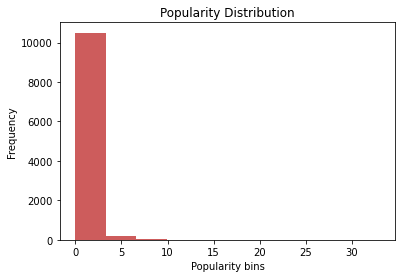

In [16]:
df['popularity'].plot(kind='hist', color='indianred')
plt.title('Popularity Distribution')
plt.xlabel('Popularity bins')
plt.ylabel('Frequency');

I visualize the spread of vote_average and I find out that most of the vote_average data is close to normally distributed and slightly left skewed.  

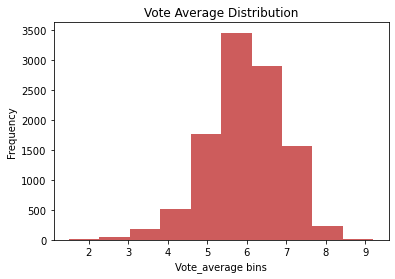

In [17]:
df['vote_average'].plot(kind='hist', color='indianred')
plt.title('Vote Average Distribution')
plt.xlabel('Vote_average bins')
plt.ylabel('Frequency');

I plot popularity against vote average and find out that there are a lot of movies with popularity values around zero which have a wide range of vote_averages but other than those movies which show no correlation, there seems to be a positive relationship between popularity and vote_average.


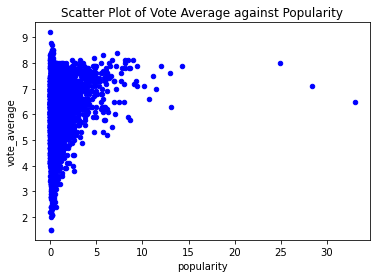

In [18]:
df.plot(x='popularity', y= 'vote_average', kind = 'scatter', color='blue')
plt.title('Scatter Plot of Vote Average against Popularity');

I segment the data into two, based on those that have popularity values greater than 1 and those that have popularity values less than 1.

In [19]:
df_less = df.query('popularity < 1')
df_great = df.query('popularity >= 1')

I plot the data with popularity of less than 1 against vote_average and I plot the correlation of other numeric factors with it and I observe that there is no relationship between the popularity and vote average in this data set and I find this interesting.

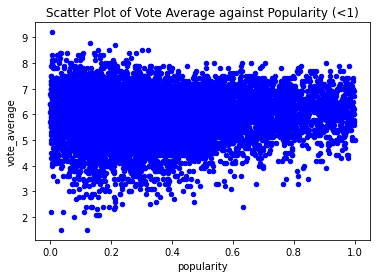

In [20]:
df_less.plot(x='popularity', y= 'vote_average', kind = 'scatter', color='blue')
plt.title('Scatter Plot of Vote Average against Popularity (<1)');

In [21]:
df_less.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.360090,0.338230,0.057245,0.397423,0.071179,0.023837,0.352606,0.318974
budget,0.360090,1.000000,0.567873,0.137472,0.470153,-0.027801,0.040775,0.951178,0.452795
revenue,0.338230,0.567873,1.000000,0.104328,0.661068,0.065730,-0.030214,0.538322,0.896941
runtime,0.057245,0.137472,0.104328,1.000000,0.064892,0.136493,-0.129663,0.169874,0.124101
vote_count,0.397423,0.470153,0.661068,0.064892,1.000000,0.132736,0.080808,0.413646,0.529801
vote_average,0.071179,-0.027801,0.065730,0.136493,0.132736,1.000000,-0.143366,-0.005203,0.098563
release_year,0.023837,0.040775,-0.030214,-0.129663,0.080808,-0.143366,1.000000,-0.070118,-0.159500
budget_adj,0.352606,0.951178,0.538322,0.169874,0.413646,-0.005203,-0.070118,1.000000,0.493207
revenue_adj,0.318974,0.452795,0.896941,0.124101,0.529801,0.098563,-0.159500,0.493207,1.000000


I plot the data with popularity greater than 1 against vote_average and I plot the correlation of other numeric factors with it and I observe that there is a slightly positive relationship (more positive than the overall dataset) between the popularity and vote average in this data set. 

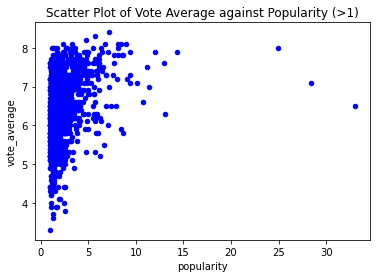

In [22]:
df_great.plot(x='popularity', y= 'vote_average', kind = 'scatter', color='blue')
plt.title('Scatter Plot of Vote Average against Popularity (>1)');

In [23]:
df_great.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.346070,0.522443,0.221903,0.711656,0.299353,0.123385,0.302595,0.446801
budget,0.346070,1.000000,0.686242,0.304696,0.516274,-0.015754,0.228339,0.968336,0.512355
revenue,0.522443,0.686242,1.000000,0.294651,0.709520,0.199607,0.077955,0.673282,0.889651
runtime,0.221903,0.304696,0.294651,1.000000,0.344615,0.317883,-0.102848,0.356281,0.312944
vote_count,0.711656,0.516274,0.709520,0.344615,1.000000,0.433153,0.151931,0.469583,0.601738
vote_average,0.299353,-0.015754,0.199607,0.317883,0.433153,1.000000,-0.186308,-0.001268,0.239435
release_year,0.123385,0.228339,0.077955,-0.102848,0.151931,-0.186308,1.000000,0.053743,-0.212017
budget_adj,0.302595,0.968336,0.673282,0.356281,0.469583,-0.001268,0.053743,1.000000,0.566029
revenue_adj,0.446801,0.512355,0.889651,0.312944,0.601738,0.239435,-0.212017,0.566029,1.000000


I plot a scatter of budget against popularity and I find out that there is a positive relationship

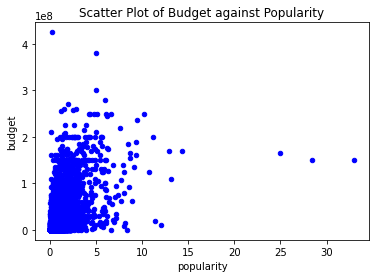

In [24]:
df.plot(x='popularity', y= 'budget', kind = 'scatter', color='blue')
plt.title('Scatter Plot of Budget against Popularity');

I plot a scatter of revenue against popularity and I find out that there is a positive relationship

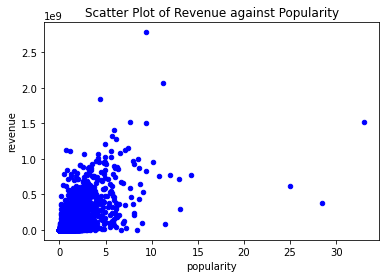

In [25]:
df.plot(x='popularity', y= 'revenue', kind = 'scatter', color='blue')
plt.title('Scatter Plot of Revenue against Popularity');

I plot a scatter of vote count against popularity and I find out that there is a positive relationship

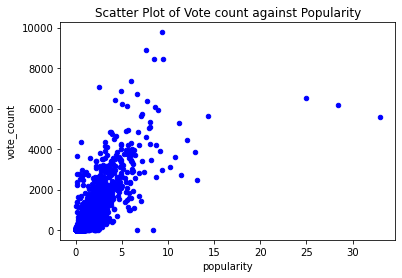

In [26]:
df.plot(x='popularity', y= 'vote_count', kind = 'scatter', color='blue')
plt.title('Scatter Plot of Vote count against Popularity');

Based on the above visualizations, I found out that there were three outliers. These movies have popularity values greater than 20, with high vote averages, modest budgets and revenues. 

In [27]:
df.query('popularity > 20')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,6498,8.0,2014,1.519800e+08,5.726906e+08


I group the popularity by release year to find the mean popularity for each year but the true picture is not clear; there is need for a visualization.

In [28]:
df.groupby('release_year')['popularity'].mean()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.489084
1968    0.495726
1969    0.436779
1970    0.341638
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.453760
1975    0.519445
1976    0.474516
1977    0.637528
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590301
1985    0.589466
1986    0.511238
1987    0.506663
1988    0.472000
1989    0.567816
1990    0.535735
1991    0.501090
1992    0.583376
1993    0.549475
1994    0.668825
1995    0.714641
1996    0.606398
1997    0.714033
1998    0.626165
1999    0.645799
2000    0.555118
2001    0.705034
2002    0.709241
2003    0.721388
2004    0.722438
2005    0.634655
2006    0.611044
2007    0.598488
2008    0.595755
2009    0.608701
2010    0.660137
2011    0.685607
2012    0.620326
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [29]:
pop = df.groupby('release_year')['popularity'].mean()

I visualize the popularity trend with time and there is an increase in the average popularity of the movies with time (i.e older movies are less popular than newer movies on average).

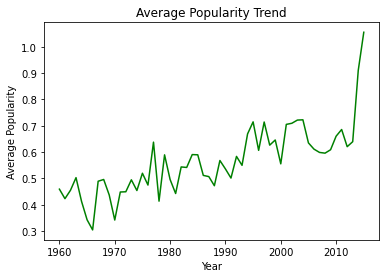

In [30]:
plt.plot(pop, color='green')
plt.title('Average Popularity Trend')
plt.xlabel('Year')
plt.ylabel('Average Popularity');


I group the vote average and vote count by release year to find the mean values for each year but the true picture is not clear as before; there is a need for a visualization.

In [31]:
df.groupby('release_year')['vote_average', 'vote_count'].mean()

<ipython-input-31-a79ad3ace947>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('release_year')['vote_average', 'vote_count'].mean()


,vote_average,vote_count
release_year,,
1960,6.325000,77.531250
1961,6.374194,77.580645
1962,6.343750,74.750000
1963,6.329412,82.823529
1964,6.211905,74.690476
1965,6.194286,52.000000
1966,6.128261,31.739130
1967,6.281579,80.815789
1968,6.371053,110.657895


In [32]:
vote_avg = df.groupby('release_year')['vote_average'].mean()

The visualization of vote average trend shows that older movies have higher vote averages than newer ones. This is interesting

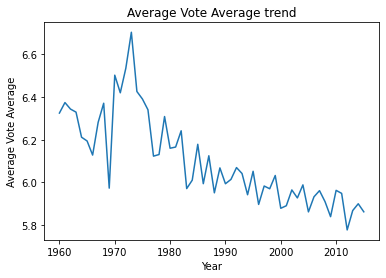

In [33]:
plt.plot(vote_avg)
plt.title('Average Vote Average trend')
plt.xlabel('Year')
plt.ylabel('Average Vote Average');

In [34]:
vote_cnt = df.groupby('release_year')['vote_count'].mean()

But the visualiztion of the vote count shows that newer movies have more vote counts than older movies.

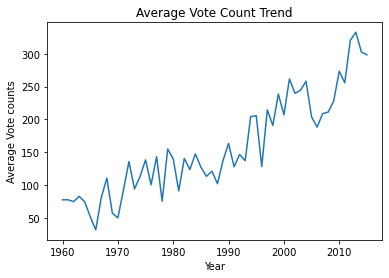

In [35]:
plt.plot(vote_cnt)
plt.title('Average Vote Count Trend')
plt.xlabel('Year')
plt.ylabel('Average Vote counts');

### What is the correlation between budget and revenue i.e Does higher budget lead to higher revenue? 

Here I plot the revenue against budget to find out if higher budget movies generate more revenue and that seems to be the case here with a very positive relationship.

Text(0.5, 1.0, 'Revenue versus Budget')

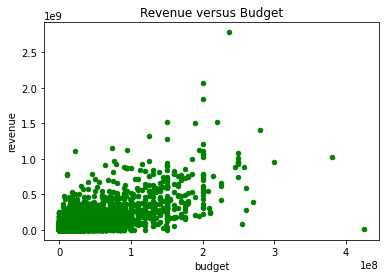

In [36]:
df.plot(x='budget', y= 'revenue', kind = 'scatter', color='green')
plt.title('Revenue versus Budget')

In [37]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


I visualize the movie genres by their frequency of appearance

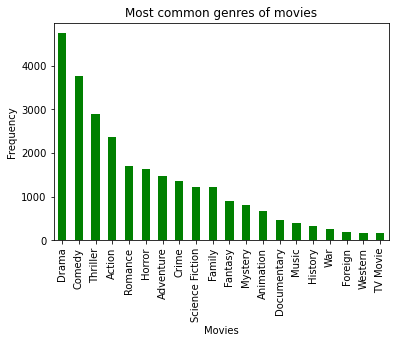

In [38]:
df['genres'].str.split('|').explode('genres').value_counts(ascending=False).plot(kind='bar', color='green'), plt.title('Most common genres of movies'),
plt.ylabel('Frequency'), plt.xlabel('Movies');


In [39]:
#df['genres'].str.split('|')[3]

#for row in df['genres']:
    #df['genres'].iloc[np.arange(len(df['genres']))] = df['genres'].str.split('|').iloc[np.arange(len(df['genres']))]

#df['genres'].iloc[0] = df['genres'].str.split('|').iloc[1]

for row in df['genres']:
    row = df['genres'].str.split('|')
    
df.explode('genres')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


I visualize using a pie chart the frequency of cast appearances in movies and showed the top 5 actors based on appearance here

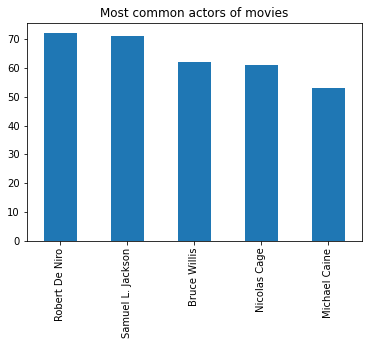

In [40]:
df['cast'].str.split('|').explode('cast').value_counts().head(5).plot(kind='bar'), plt.title('Most common actors of movies');

In [45]:
df['genres'] = df['genres'].str.split('|', expand=True)

In [46]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


<AxesSubplot:xlabel='genres'>

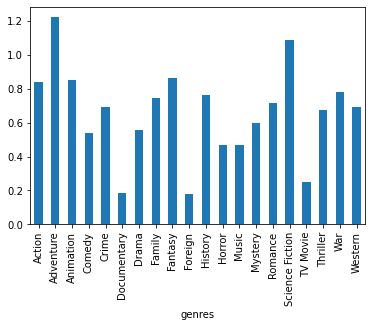

In [53]:
df.groupby('genres')['popularity'].mean().plot(kind='bar')

In [ ]:
df.groupby('release_year')['vote_average'].mean()

<a id='conclusions'></a>
## Conclusions

> Based on the analysis above, I found out that Budget, Revenue and Vote count are the most influential factors affecting popularity and while newer movies are more popular and have more vote counts on average, they have less vote averages.

> I also found that vote average seems to be uninfluenced by the other numeric values except for popularity, runtime and vote count.

> Based on the analysis, there is a strong positive relationship between the budget and revenue. (So it pays to invest a lot in a movie, because this may lead to a lot of revenue).  



### Limitations
> The correlation is tentative and I can't state explicitly that a high budget is the principal cause of high revenue. There might be other factors at play, such as the cast, the director or the popularity of the movie that would influence the revenue.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1